# Centralities overview 

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


Bad key savefig.frameon in file /home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/benelot/miniconda3/envs/vre-spark/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.

In [6]:
# source: https://github.com/briandconnelly/seeds/blob/master/seeds/plugins/topology/CartesianTopology.py
def build_graph(size=0, expected_neighbors=0,
                periodic=False, seed=False, remove_disconnected=True):
    """Build the graph
    Parameters:
    *size*
        The number of nodes to be in the graph
    *expected_neighbors*
        The expected degree of each node in the graph
    *periodic*
        Whether or not to use periodic boundary conditions
    """
    if seed:
        np.random.seed(seed)

    # Calculate the distance required to yield the expected # neighbors
    if size == 1:
        radius = 1
    else:
        radius = np.sqrt( (expected_neighbors / (size - 1.0)) / np.pi)

    # Create bins in which to put node so we only check a fraction of
    # candidate neighbors
    num_bins = int(np.ceil(1/radius))
    neighbor_bins = []
    for i in range(num_bins):
        neighbor_bins.append([])
        for j in range(num_bins):
            neighbor_bins[i].append([])

    G = nx.empty_graph()
    G.name = "Cartesian Topology Graph"
    G.add_nodes_from(list(range(size)))

    # Create the collection of nodes and put them into bins with
    # candidate neighbors
    _rndm = np.random.random
    for n in G.nodes():
        xcoord = _rndm()
        ycoord = _rndm()
        G.nodes[n]['coords'] = (xcoord, ycoord)

        # Put node into bin with candidate neighbors
        bin_x = int(np.floor(xcoord/radius))
        bin_y = int(np.floor(ycoord/radius))
        neighbor_bins[bin_x][bin_y].append(n)

    # Find actual neighbors and create edges between nodes
    for x in range(num_bins):
        for y in range(num_bins):

            # Get all potential neighbors (those in adjacent bins)
            potentials = []
            for px in range(x-1, x+1+1):
                if (periodic == False and
                    (px < 0 or px >= num_bins)):
                    continue

                for py in range(y-y, y+1+1):
                    if (periodic == False and
                        (py < 0 or py >= num_bins)):
                        continue

                    potentials += neighbor_bins[px % num_bins][py % num_bins]

            for node in neighbor_bins[x][y]:
                node_coords = G.nodes[node]['coords']
                for potential in potentials:
                    p_coords = G.nodes[potential]['coords']
                    if (within_range(node_coords, p_coords, radius,
                                          periodic) and
                        node != potential):
                        G.add_edge(node, potential)

                if G.degree(node) == 0:
                    if remove_disconnected:
                        G.remove_node(node)
                        neighbor_bins[x][y].remove(node)
                    else:
                        G.add_edge(node, random.choice(potentials))

            neighbor_bins[x][y] = []

    return G

def within_range(node1, node2, distance, periodic):
    """Determine whether or not two nodes are within a given distance from
    each other
    Parameters:
    *node1*
        The first node (tuple)
    *node2*
        The second node (tuple)
    *distance*
        The threshold distance 
    *periodic*
        Whether or not periodic boundary conditions are used.
    """

    return euclidean_distance(node1, node2, periodic) < distance

def add_node(self, id=-1, neighbors=[]):
    """Add a node to the graph.  Not supported by this topology type"""
    raise ConfigurationError("add_node is not supported by CartesianTopology")
    return

def remove_node(self, id):
    """Remove a node from the graph.  Not supported by this topology
    type"""
    raise ConfigurationError("remove_node is not supported by CartesianTopology")
    return

def add_edge(self, src, dest):
    """Add an edge to the graph.  Not supported by this topology type"""
    raise ConfigurationError("add_edge is not supported by CartesianTopology")
    return

def remove_edge(self, src, dest):
    """Remove an edge from the graph.  Not supported by this topology
    type"""
    raise ConfigurationError("remove_edge is not supported by CartesianTopology")
    return

def minkowski_distance_p(point1, point2, p=2, periodic=False):
    """Calculate the Minkowski distance to the pth power between two points.
    This is the Minkowski distance calculation without the root.
    Arguments:
    *point1*
        A tuple containing the coordinates of the first point
    *point2*
        A tuple containing the coordinates of the second point
    *p*
        Order parameter.  A value of 2 yields Euclidean distance, while a value
        of 1 yields Manhattan distance.  (Default: 2)
    *periodic*
        Whether or not periodic boundaries are used.  If they are, the distance
        along any dimension is the minimum of the distance between the two
        points not using the periodic edges or the distance using those edges.
    """
    dist = -1

    if len(point1) != len(point2):
        print("Error: dimensions do not match")
        return
    elif len(point1) > 1:
        dist = 0

        for dim in range(len(point1)):
            if periodic:
                d = abs(point1[dim] - point2[dim])
                d_periodic = abs(1-d)
                dist += min(d, d_periodic)**p
            else:
                dist += (point1[dim] - point2[dim])**p

    elif is_numeric(point1) and is_numeric(point2):
        if periodic:
            d = abs(point1 - point2)
            d_periodic = abs(1-d)
            dist = min(d, d_periodic)**p
        else:
            dist = (point1 - point2)**p

    return dist

def minkowski_distance(point1, point2, p=2, periodic=False):
    """Calculate the Minkowski distance between two points.
    Arguments:
    *point1*
        A tuple containing the coordinates of the first point
    *point2*
        A tuple containing the coordinates of the second point
    *p*
        Order parameter.  A value of 2 yields Euclidean distance, while a value
        of 1 yields Manhattan distance.  (Default: 2)
    *periodic*
        Whether or not periodic boundaries are used.  If they are, the distance
        along any dimension is the minimum of the distance between the two
        points not using the periodic edges or the distance using those edges.
    """

    return minkowski_distance_p(point1, point2, p=p, periodic=periodic)**(1.0/p)

def euclidean_distance(p1, p2, periodic=False):
    """Calculate the Euclidean distance between two points.
    Arguments:
    *p1*
        A tuple containing the coordinates of the first point
    *p2*
        A tuple containing the coordinates of the second point
    *periodic*
        Whether or not periodic boundaries are used.  If they are, the distance
        along any dimension is the minimum of the distance between the two
        points not using the periodic edges or the distance using those edges.
    """

    return minkowski_distance(point1=p1, point2=p2, p=2, periodic=periodic)


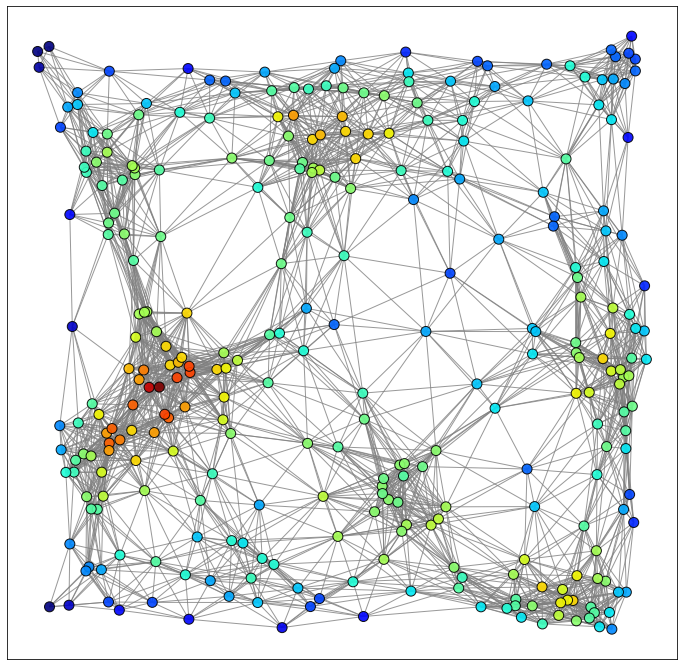

In [7]:
seed=7
G = build_graph(300, 23, False, seed=seed)
pos = nx.spring_layout(G, iterations=100, seed=seed)

dcent = nx.degree_centrality(G)
ecent = nx.eigenvector_centrality_numpy(G)
bcent = nx.betweenness_centrality(G)
ccent = nx.closeness_centrality(G)

cent = dcent
cent_color = [i for _,i in cent.items()]

plt.subplots(figsize=(12,12))
nx.draw_networkx_edges(G, pos, alpha=0.8, width=1, edge_color="grey")
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=cent_color, edgecolors="black", alpha=0.9, cmap='jet')
plt.show()

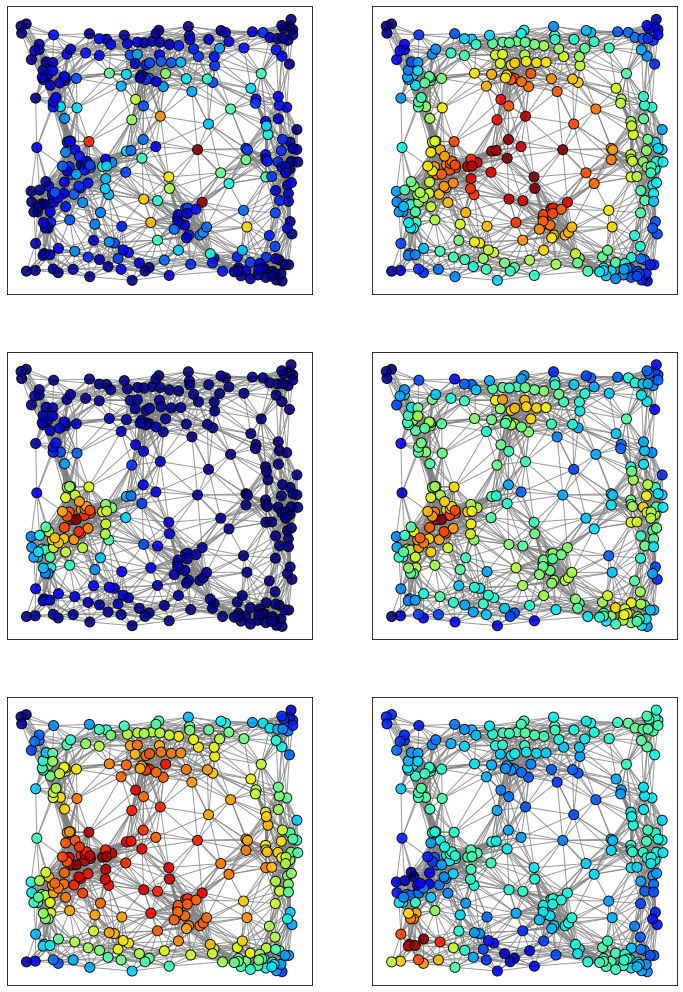

In [8]:
from functools import reduce

def get_factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))
def find_closest_factor_to_sqrt(n):
    factors = get_factors(n)
    sq = np.sqrt(n)
    difference = n
    closest = n
    for f in factors:
        if abs(f - sq) < difference:
            difference = abs(f - sq)
            closest = f
    return closest
    
def plot_centralities(G, centralities, size_of_panel=6):
    panel_qty = len(centralities)
    cols = find_closest_factor_to_sqrt(panel_qty)
    rows = int(panel_qty / cols)
    
    fig, ax = plt.subplots(ncols=cols, nrows=rows, figsize=(size_of_panel * cols, size_of_panel * rows))
    for i, centrality in enumerate(centralities):
        col = int(i/cols)
        row = i % cols
        
        cent_color = [i for _,i in centrality.items()]

        nx.draw_networkx_edges(G, pos, alpha=0.8, width=1, edge_color="grey", ax=ax[col, row])
        nx.draw_networkx_nodes(G, pos, node_size=100, node_color=cent_color, edgecolors="black", alpha=0.9, cmap='jet', ax=ax[col, row])
    plt.show()
           
centralities = [c(G) for c in [nx.betweenness_centrality, nx.closeness_centrality, nx.eigenvector_centrality_numpy, nx.degree_centrality, nx.harmonic_centrality, nx.katz_centrality_numpy]]
plot_centralities(G, centralities)